In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
! pip install fitter
import fitter
from fitter import Fitter, get_common_distributions, get_distributions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.7 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=748440ff8e9f43c334b060594f256ddbb65e25c5f241c16346eb6eebee984b3b
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=ded2efd21830b319f59f3eeaf873f701471157343a7ca7f293f6244418d5fde1
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
df= pd.read_excel("/content/TARGET_IVECO_3.0_AN.xlsx")
#df=df.loc[df['Obiettivo']=='REACH']

data preprocessing

In [ ]:
if "country" in list(set(df.columns)):
  df['Country']=df['country'].copy()


df['Country']=df['Country'].str.replace('BL','BE')
df['Country']=df['Country'].str.replace('BE FR','BE')
df['Country']=df['Country'].str.replace('BE NL','BE')
if "placement" in list(set(df.columns)):
  df['placement']=df['placement'].str.replace('IGStory','IG')
  df['placement']=df['placement'].str.replace('IGstory','IG')
  df['placement']=df['placement'].str.replace('FBIG','FB')
if "formato" in list(set(df.columns)):
  df['Tipologia']=df['formato']
if "placement" in list(set(df.columns)):
  df['Channel']=df['placement']


In [ ]:
df['Country']=df['Country'].astype(str)
df['Tipologia']=df['Tipologia'].astype(str)

df=df.loc[df['Country']!="nan"]
df=df.loc[df['Tipologia']!="nan"]



df.loc[df.Tipologia != 'Static', 'Tipologia']='Video'  

df['Obiettivo']=df['Obiettivo'].str.replace("OUTCOME_AWARENESS", 'REACH')

In [ ]:
df['IR%']=df['Interazioni con il post']/df['Impression']

In [ ]:
df.loc[df['Obiettivo']=="REACH"]

,obj.,mese,topic,formato,placement,country,Nome del gruppo di inserzioni,Nome dell'inserzione,Obiettivo,Nome della campagna,...,Condivisioni dei post,Commenti ai post,"""Mi piace"" sulla Pagina",Clic (tutti),Inizio dei report,Fine dei report,Country,Tipologia,Channel,IR%
30,REACH,2022-04-01,EarthDay,PPV,FB,BE FR,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_BE F...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_BE FR,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,NaN,NaN,NaN,228,2021-12-01,2022-04-30,BE,Video,FB,0.094278
31,REACH,2022-04-01,EarthDay,PPV,FB,BE FR,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_BE F...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_BE FR,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,NaN,NaN,NaN,10,2021-12-01,2022-04-30,BE,Video,FB,0.055045
32,REACH,2022-04-01,EarthDay,PPV,FB,BE NL,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_BE N...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_BE NL,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,NaN,NaN,NaN,127,2021-12-01,2022-04-30,BE,Video,FB,0.083760
33,REACH,2022-04-01,EarthDay,PPV,FB,BE NL,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_BE N...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_BE NL,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,NaN,NaN,NaN,19,2021-12-01,2022-04-30,BE,Video,FB,0.061478
34,REACH,2022-04-01,EarthDay,PPV,FB,ES,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_ES -...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_ES,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,2.0,2.0,NaN,1345,2021-12-01,2022-04-30,ES,Video,FB,0.088708
35,REACH,2022-04-01,EarthDay,PPV,FB,ES,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_ES -...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_ES,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,NaN,NaN,NaN,98,2021-12-01,2022-04-30,ES,Video,FB,0.068078
36,REACH,2022-04-01,EarthDay,PPV,FB,IT,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_IT -...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_IT,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,2.0,NaN,NaN,1121,2021-12-01,2022-04-30,IT,Video,FB,0.062777
37,REACH,2022-04-01,EarthDay,PPV,FB,IT,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_IT -...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_IT,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,NaN,1.0,NaN,101,2021-12-01,2022-04-30,IT,Video,FB,0.059776
38,REACH,2022-04-01,EarthDay,PPV,FB,PL,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_PL -...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_PL,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,1.0,1.0,NaN,990,2021-12-01,2022-04-30,PL,Video,FB,0.075817
39,REACH,2022-04-01,EarthDay,PPV,FB,PL,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_PL -...,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_PL,REACH,[OG] REACH_22-25Apr2022_EarthDay_PPV_FBIG_SI,...,NaN,NaN,NaN,67,2021-12-01,2022-04-30,PL,Video,FB,0.059530


Fitting Distribution to Dataset

In [ ]:
df.head(2)

,obj.,mese,topic,formato,placement,country,Nome del gruppo di inserzioni,Nome dell'inserzione,Obiettivo,Nome della campagna,...,Condivisioni dei post,Commenti ai post,"""Mi piace"" sulla Pagina",Clic (tutti),Inizio dei report,Fine dei report,Country,Tipologia,Channel,IR%
0,Engagement,2022-03-01,DailyCommunityBuilding,Static,FB,BE FR,[OG] Engagement_19-21Mar2022_DailyCommunityBui...,Engagement_19-21Mar2022_DailyCommunityBuilding...,POST_ENGAGEMENT,[OG] Engagement_19-21Mar2022_DailyCommunityBui...,...,2.0,9.0,NaN,815,2021-12-01,2022-04-30,BE,Static,FB,0.013145
1,Engagement,2022-03-01,DailyCommunityBuilding,Static,FB,BE NL,[OG] Engagement_19-21Mar2022_DailyCommunityBui...,Engagement_19-21Mar2022_DailyCommunityBuilding...,POST_ENGAGEMENT,[OG] Engagement_19-21Mar2022_DailyCommunityBui...,...,1.0,26.0,NaN,1542,2021-12-01,2022-04-30,BE,Static,FB,0.016738


In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 0.9)
sns.displot(data=df, x="CPM", kind="hist", bins = 10, aspect = 1.5)

ValueError: ignored

 Data Preparation


The next step is to prepare the data. Before we supply the data to Fitter we need to convert it to a NumPy array. One of the best ways to use the .values attribute on the selected column 

In [ ]:
df['CPM']= (df['Importo speso (EUR)']/df['Impression'])*1000
column = df['Impression'].values


,sumsquare_error,aic,bic,kl_div
beta,8.864573e-10,6329.871628,-20087.815930,inf
lognorm,2.856213e-09,3118.815541,-19236.789271,inf
burr,3.264892e-09,3115.638385,-19132.167862,inf
expon,3.682889e-09,4687.121921,-19057.057105,inf
powerlaw,5.727011e-09,2761.335287,-18726.843160,inf


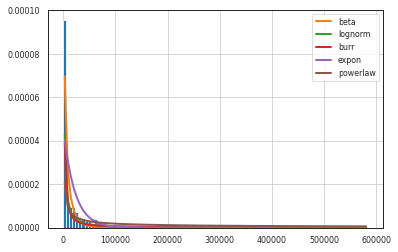

In [ ]:
f = Fitter(column,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "expon",
                          "powerlaw", 
                          "rayleigh", 
                          "uniform"])
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')


{'beta': {'a': 0.4796569063684609,
  'b': 411.96235156371637,
  'loc': 1.9999999999999998,
  'scale': 6196093.714036599}}

**Monte Carlo Simulation**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')


In [ ]:
df['Impression'].describe()#['mean']
df['Impression'].describe()['mean']

21730.94133697135

In [ ]:
def find_moments_reps_simulations(column, num_reps, num_simulations):
  avg =  df['Impression'].describe()['mean'] 
  std_dev = df['Impression'].describe()['std'] 
  num_reps = df['Impression'].describe()['count'] 
  num_simulations = num_simulations
  return avg, std_dev, num_reps





In [ ]:
avg, std_dev, num_reps= find_moments_reps_simulations(df['Impression'], 500, 1000)

In [ ]:



# Now we can use numpy to generate a list of percentages that will replicate our historical x distribution:
pct_to_target = np.random.exponential(find_moments_reps_simulations(df['Impression'], 500, 1000)).round(2)



In [ ]:
from scipy.stats import beta
beta.fit(df['Impression'])

(0.4796569063684609, 411.96235156371637, 1.9999999999999998, 6196093.714036599)

In [ ]:
from scipy.stats import beta
beta.fit(df["Importo speso (EUR)"])

(0.3700262904178252,
 28.996199568648322,
 -6.710550645820582e-25,
 739.2027109463534)

In [ ]:
# generate random impressions with that distribution
variable = np.random.beta(0.476, 1.075, size=1000) 
variable2 = np.random.beta(0.3, 0.6, size=1000)


In [ ]:
for i in range(1000):
  df_final=pd.DataFrame()

  df = pd.DataFrame(index=range(1000), data={'Impression': variable*267562,
                                               'Budget': variable2*191})


  df['CPM']=  (df['Budget']/df['Impression'])*1000
  df['CPM']=  df['CPM'].astype(float)


  df=df.loc[df['CPM']<2]
  df=df.loc[df['Budget']<200]
  df=df.loc[df['Budget']>20]

  

  df_final=df_final.append(df)


In [ ]:
df_final['Budget'].max()

190.97715466237756

In [ ]:
df_final['Budget'].min()

20.166341234538613

In [ ]:
df_final['Budget'].mean()

88.8569023200949

In [ ]:
df_final

,Impression,Budget,CPM
0,111048.027430,56.280898,0.506816
3,215445.274581,162.818354,0.755730
8,87207.147556,136.010301,1.559623
11,165271.119841,32.258534,0.195186
15,126675.751636,87.764607,0.692829
...,...,...,...
989,226186.212428,93.702962,0.414274
990,267263.592289,155.247566,0.580878
992,42611.103358,34.741481,0.815315
993,213266.520061,71.813456,0.336731


In [ ]:
df_final.describe()

,Impression,Budget,CPM
count,313.000000,313.000000,313.000000
mean,131082.702009,100.989448,0.902401
std,64480.533134,55.943696,0.488634
min,13026.510343,20.322678,0.100881
25%,73013.153716,49.309392,0.504766
50%,130675.540718,94.113080,0.860719
75%,178971.630221,155.706983,1.212785
max,261198.772040,190.999854,1.993430


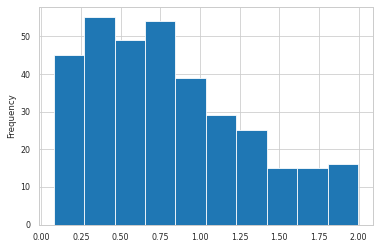

In [ ]:
df_final['CPM'].plot.hist()